In [91]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [92]:
def find_chip_center_robust(image_path, threshold_val=40):

    img = cv2.imread(image_path)
    if img is None:
        return None, None, None
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    h, w = gray.shape

    roi_size = 500
    start_x = (w - roi_size) // 2
    start_y = (h - roi_size) // 2
    
    roi_center = np.array([start_x + roi_size // 2, start_y + roi_size // 2])
    
    roi_gray = gray[start_y : start_y + roi_size, start_x : start_x + roi_size]

    _, thresh_roi = cv2.threshold(roi_gray, threshold_val, 255, cv2.THRESH_BINARY_INV)

    kernel = np.ones((3,3), np.uint8)
    thresh_roi = cv2.dilate(thresh_roi, kernel, iterations=1) # Makes the contour thicker/more complete
    
    contours, _ = cv2.findContours(thresh_roi.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        return None, None, None

    best_contour = max(contours, key=cv2.contourArea) 
    
    
    (Cx_roi, Cy_roi), R = cv2.minEnclosingCircle(best_contour)
    
    
    Cx_full = int(Cx_roi) + start_x
    Cy_full = int(Cy_roi) + start_y
    
    return Cx_full, Cy_full, int(R)




In [93]:
image_file = r"D:\Test1\1024_13_G.png"
NEW_THRESHOLD = 14

In [94]:
def verify_chip_center(image_path, center_x, center_y, radius, output_path):
    """Draws the circle and center marker on the image and saves it."""
    # Read the image in BGR format
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not read image for verification at {image_path}")
        return None
        
    center_point = (center_x, center_y)
    
    # Draw the main circle (Green, thickness 2)
    cv2.circle(img, center_point, radius, (0, 255, 0), 2)
    # Draw the center point (Blue, solid)
    cv2.circle(img, center_point, 5, (255, 0, 0), -1) # Changed to Blue (255,0,0) for better visibility
    # Draw crosshair (White)
    cv2.line(img, (center_x - 20, center_y), (center_x + 20, center_y), (255, 255, 255), 1)
    cv2.line(img, (center_x, center_y - 20), (center_x, center_y + 20), (255, 255, 255), 1)
    
    # Save the processed image
    cv2.imwrite(output_path, img)
    print(f"   Verification Image Saved: {output_path}")
    
    return img # Return the image object



In [95]:
# --- Execution Block ---

# NOTE: This path must be valid on your system for the code to work.
image_file = r"D:\Test1\1024_13_G.png"

# Using a robust threshold
NEW_THRESHOLD = 14

# 1. Run the improved function
center_x, center_y, radius = find_chip_center_robust(image_file, threshold_val=NEW_THRESHOLD)


✅ New Center Found with Threshold=14:
   Center (Cx, Cy): (1616, 1617)
   Radius (R): 201
   Verification Image Saved: 1024_1_center_verified_new_thresh_14.jpg


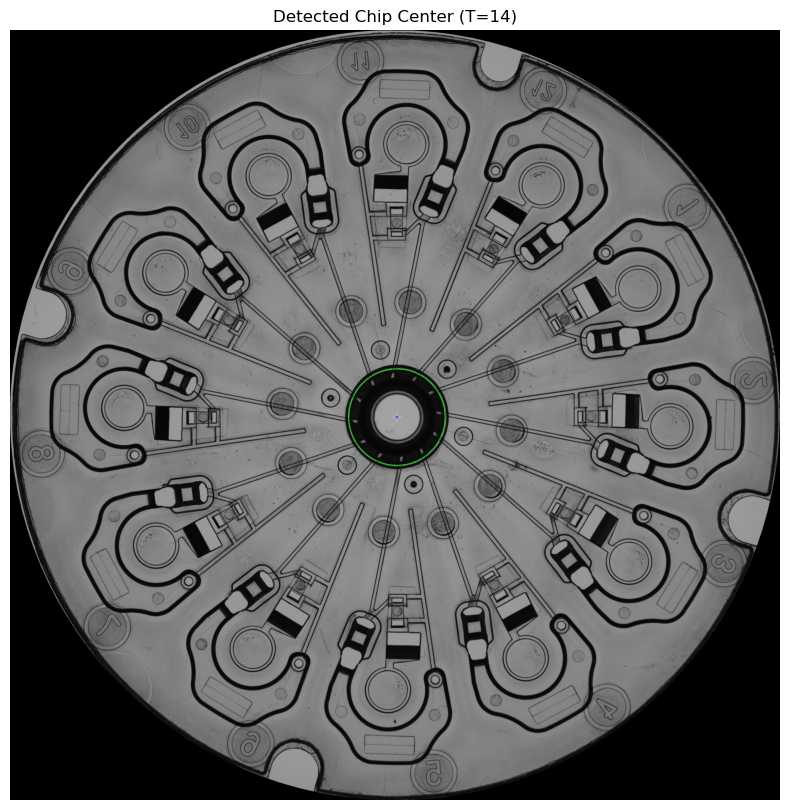

In [96]:
if center_x is not None:
    print(f"\n✅ New Center Found with Threshold={NEW_THRESHOLD}:")
    print(f"   Center (Cx, Cy): ({center_x}, {center_y})")
    print(f"   Radius (R): {radius}")
    
    # 2. Run the visual verification function
    output_file = f"1024_1_center_verified_new_thresh_{NEW_THRESHOLD}.jpg"
    
    # Get the processed image object
    processed_img = verify_chip_center(image_file, center_x, center_y, radius, output_file)

    # 3. Display the image using Matplotlib 🖼️
    if processed_img is not None:
        # OpenCV reads images as BGR, but Matplotlib expects RGB. Convert it.
        img_rgb = cv2.cvtColor(processed_img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10))
        plt.imshow(img_rgb)
        plt.title(f'Detected Chip Center (T={NEW_THRESHOLD})')
        plt.axis('off') # Hide axis ticks and labels
        plt.show()
